---
# 도발 유형 변화 및 정권별 특성 분석
작성자: 김지민, 김영성, 신경민, 현지영

이 노트북은 북한 도발 사건 데이터를 기반으로 시기별 사건 분포 및 정권별 도발 유형을 시각적으로 분석합니다.

## 주요 분석 항목
- 전체 연도별 도발 사건 수 분석 (막대 차트)
- 월별 도발 빈도 변화 추세 확인 (라인 차트)
- 연도별 도발 유형 분포 (스택 막대그래프)
- 북한/한국 정권별 도발 총량 및 유형 분포 비교
- 오물풍선 유형 제외 시 도발 변화 흐름 분석

## 데이터 설명
- 사용 데이터: `provocation_events.csv`
- 주요 컬럼: `Type`, `Date`, `Case`, `Latitude`, `Longitude`, `Year`, `n_gov`, `s_gov`
- 저장 경로: `/data/provocation_events.csv`


※ 이 분석은 도발 유형의 연도별 변화, 특정 정권 시기의 특성 분석, 특정 시기 집중 도발 여부 등을 탐색하기 위한 사전 분석에 활용됩니다.

---

In [3]:
import platform
import pandas as pd 
import matplotlib.pyplot as plt

if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    print('Unknown system...')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [4]:
provocation_events = pd.read_csv('data/provocation_events.csv', encoding='utf-8')
provocation_events

,Type,Date,Case,Latitude,Longtitude,Year,n_gov,s_gov
0,피습 사건,1945-09-05,"조선정판사, 위조지폐 사건",NaN,NaN,1945,임시정부,임시정부
1,피습 사건,1946-01-18,학병동맹사건,NaN,NaN,1946,임시정부,임시정부
2,피습 사건,1946-01-29,정계요인 암살 및 경찰서 방화기도 사건,NaN,NaN,1946,임시정부,임시정부
3,피습 사건,1946-05-08,연백평야 통구(通水)단절 사건,NaN,NaN,1946,임시정부,임시정부
4,피습 사건,1946-07-12,국대안 반대 사건,NaN,NaN,1946,임시정부,임시정부
...,...,...,...,...,...,...,...,...
730,핵실험,2009-05-25,풍계리 핵실험장에서 시행된 북한의 2차 핵실험,41.29142,129.08167,2009,김정일,이명박
731,핵실험,2013-02-12,풍계리 핵실험장에서 시행된 북한의 3차 핵실험,41.26809,129.08076,2013,김정은,박근혜
732,핵실험,2016-01-06,풍계리 핵실험장에서 시행된 북한의 4차 핵실험,41.309,129.03399,2016,김정은,박근혜
733,핵실험,2016-09-09,풍계리 핵실험장에서 시행된 북한의 5차 핵실험,41.298,129.015,2016,김정은,박근혜


--------

## 1. 주요 도발 유형 중심의 시기별 분석

### 1) 연도별 전체 도발 사건 수 (막대 차트)
- 전체적인 사건 추세 파악

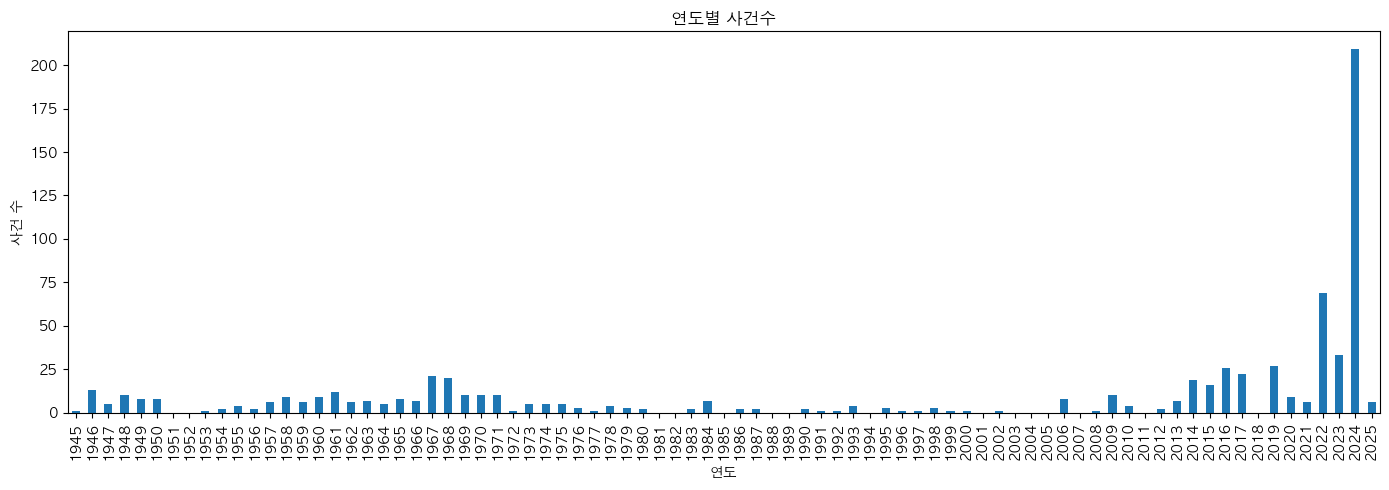

In [5]:
year_range = range(provocation_events['Year'].min(), provocation_events['Year'].max() + 1)

# 사건 수 집계
df_yearly = provocation_events.groupby('Year').size()

# 누락된 연도 채우기
df_yearly = df_yearly.reindex(year_range, fill_value=0)

# 그래프 그리기
plt.figure(figsize=(14, 5))
df_yearly.plot(kind='bar')
plt.title('연도별 사건수')
plt.xlabel('연도')
plt.ylabel('사건 수')
plt.tight_layout()
plt.show()

### 2) 2010~2013년 월별 도발 사건수 추세 (라인 차트)
- 4년간 도발 사건의 월별 빈도 변화를 시각화하여 도발이 없던 시기를 파악
- 월 단위로 집계하고 누락된 월은 0으로 보완

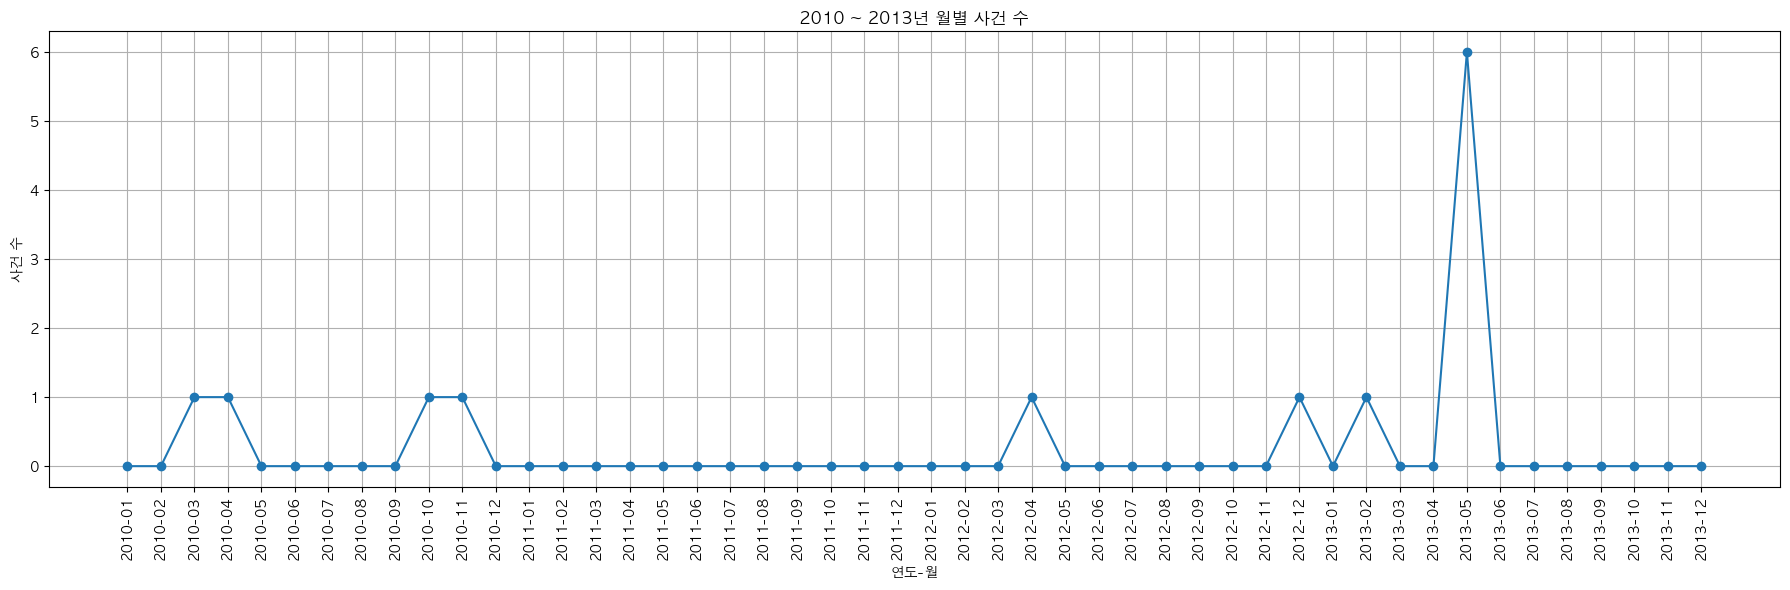

In [6]:
# 날짜 데이터 datetime 형식으로 변환 + 연월 컬럼 생성
provocation_events['Date'] = pd.to_datetime(provocation_events['Date'], errors='coerce')
provocation_events['year_month'] = provocation_events['Date'].dt.to_period('M')

# 분석 대상 월 범위 정의
all_months = pd.period_range(start='2010-01', end='2013-12', freq='M')

# 해당 기간 데이터 필터링
mask = (provocation_events['year_month'] >= '2009-01') & (provocation_events['year_month'] <= '2013-12')
df_filtered = provocation_events[mask]

# 월별 사건 수 집계
month_counts = (
    df_filtered['year_month']
    .value_counts()
    .sort_index()
    .reindex(all_months, fill_value=0)  # 누락된 월은 0으로 채움
)

# 라인 그래프 시각화
plt.figure(figsize=(18, 6))
plt.plot(month_counts.index.astype(str), month_counts.values, marker='o')
plt.xticks(ticks=range(len(month_counts)), labels=month_counts.index.astype(str), rotation=90)
plt.title('2010 ~ 2013년 월별 사건 수')
plt.xlabel('연도-월')
plt.ylabel('사건 수')
plt.grid(True)
plt.tight_layout()
plt.show()

###  3) 연도별 도발 유형 분포 (스택 막대그래프)
- 시기별 도발의 유형별 분포 분석

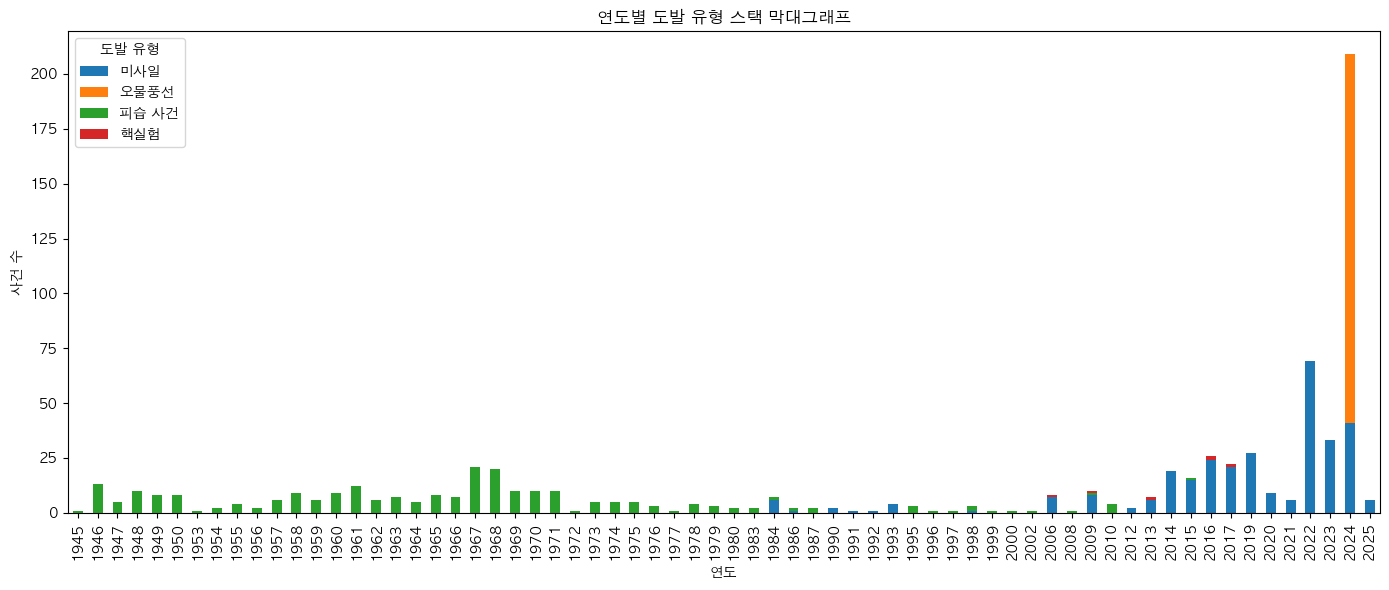

In [7]:
df_bar = provocation_events.groupby(['Year', 'Type']).size().unstack(fill_value=0)

df_bar.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('연도별 도발 유형 스택 막대그래프')
plt.xlabel('연도')
plt.ylabel('사건 수')
plt.legend(title='도발 유형')
plt.tight_layout()
plt.show()

### 4) 도발 유형별 연도 흐름 (라인차트)
- 유형별 변화를 개별 추세로 확인

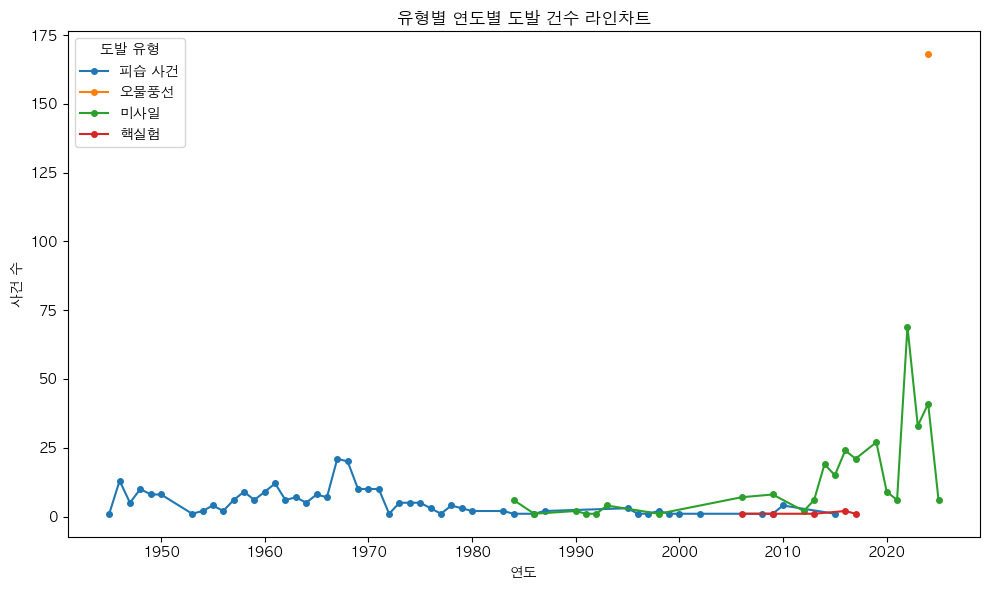

In [8]:
plt.figure(figsize=(10, 6))
for t in provocation_events['Type'].unique():
    df_type = provocation_events[provocation_events['Type'] == t].groupby('Year').size()
    plt.plot(df_type.index, df_type.values, marker='o', markersize=4, label=t)

plt.title('유형별 연도별 도발 건수 라인차트')
plt.xlabel('연도')
plt.ylabel('사건 수')
plt.legend(title='도발 유형')
plt.tight_layout()
plt.show()

### 5) 북한 정권별 도발 총량 비교 (단일 막대 그래프)
- 북한 정권의 총량 파악

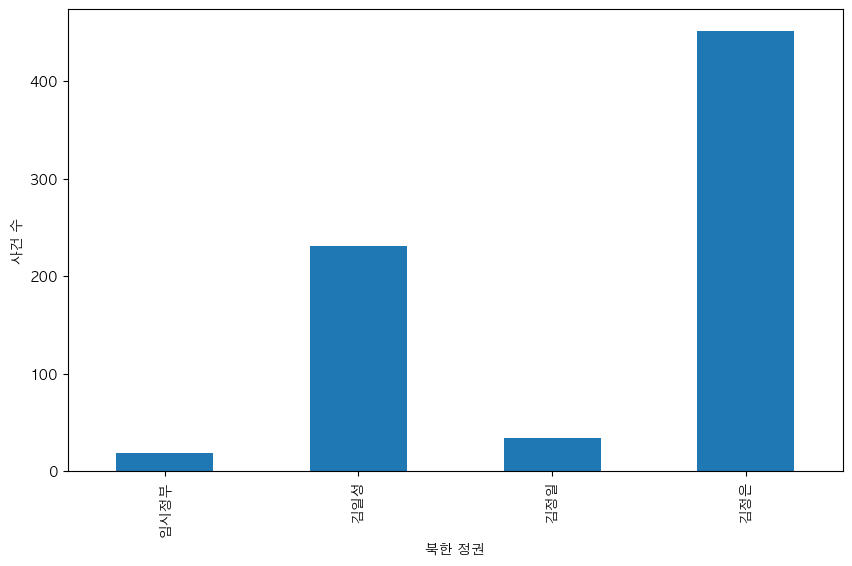

In [9]:
provocation_events['북한정권'] = pd.Categorical(
    provocation_events['n_gov'],
    categories=['임시정부', '김일성', '김정일', '김정은'],
    ordered=True
)

df = provocation_events.groupby('북한정권', observed=True).size()
df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('북한 정권')
plt.ylabel('사건 수')
plt.show()

### 6) 북한 정권별 도발 유형 분포 (스택 막대그래프)
- 각 정권이 어떤 도발을 주로 했는지 분석

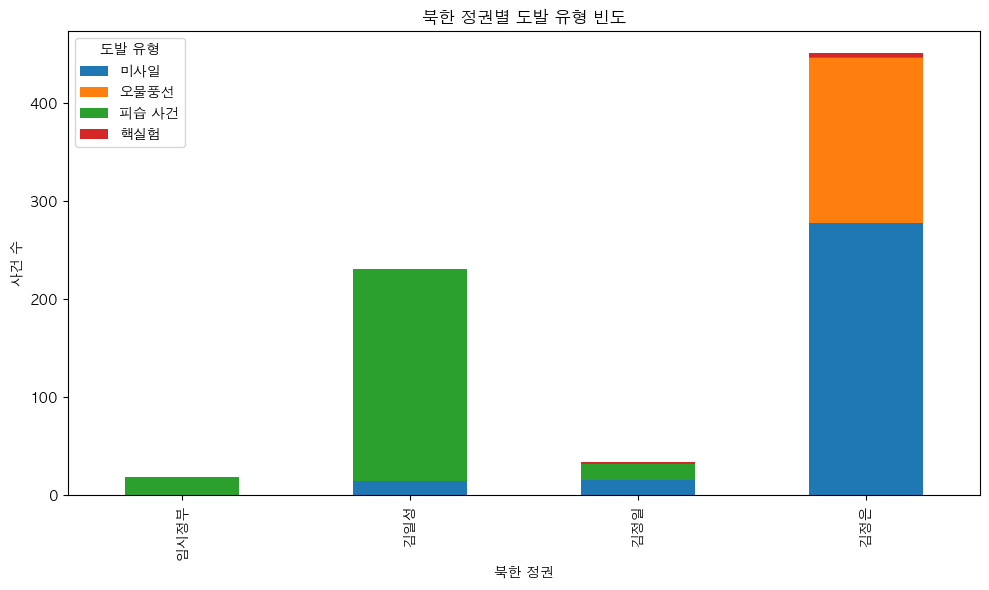

In [10]:
provocation_events['북한정권'] = pd.Categorical(
    provocation_events['n_gov'],
    categories=['임시정부', '김일성', '김정일', '김정은'],
    ordered=True
)

df_north = provocation_events.groupby(['북한정권', 'Type'], observed=True).size().unstack(fill_value=0)

df_north.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('북한 정권별 도발 유형 빈도')
plt.xlabel('북한 정권')
plt.ylabel('사건 수')
plt.legend(title='도발 유형')
plt.tight_layout()
plt.show()

### 7) 한국 정권별 도발 유형 분포 (스택 막대 그래프)
- 대응 & 동시기적 분석을 위해 남한 정권과 비교

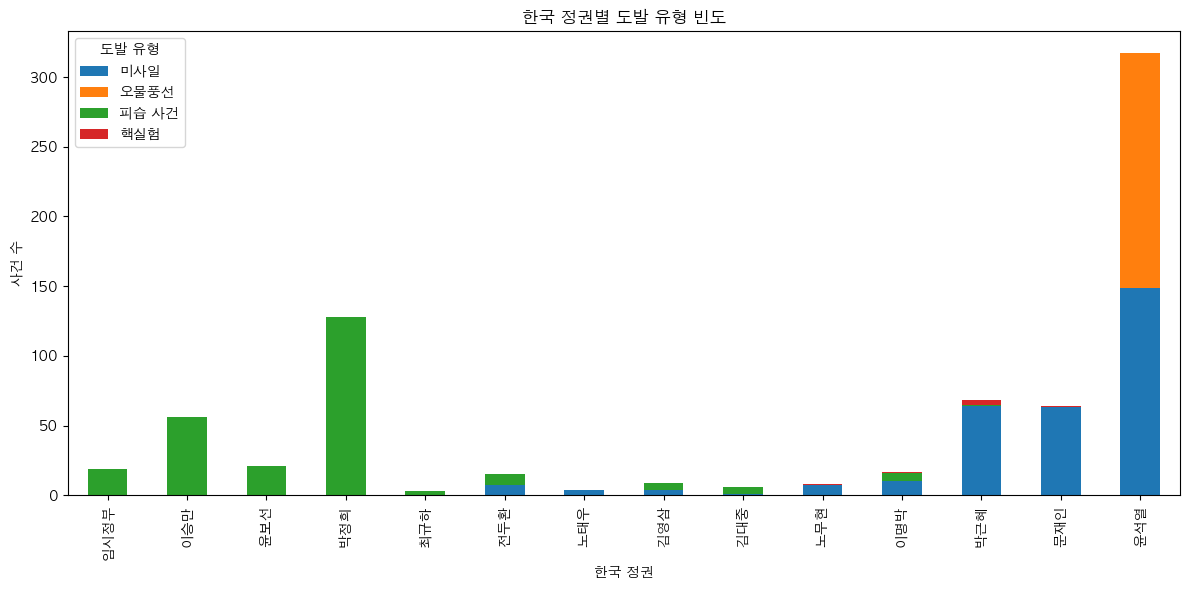

In [11]:
regime_order_s = ['임시정부', '이승만', '윤보선', '박정희', '최규하', '전두환', '노태우',
                  '김영삼', '김대중', '노무현', '이명박', '박근혜', '문재인', '윤석열']

provocation_events['한국정권'] = pd.Categorical(
    provocation_events['s_gov'],
    categories=regime_order_s,
    ordered=True
)

df_south = provocation_events.groupby(['한국정권', 'Type'], observed=True).size().unstack(fill_value=0)

df_south.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('한국 정권별 도발 유형 빈도')
plt.xlabel('한국 정권')
plt.ylabel('사건 수')
plt.legend(title='도발 유형')
plt.tight_layout()
plt.show()

------

## 2. 오물풍선 제외 도발 유형 분석 및 시각화

#### 1) 연도별 주요 도발 유형 추이 (오물풍선 제외)

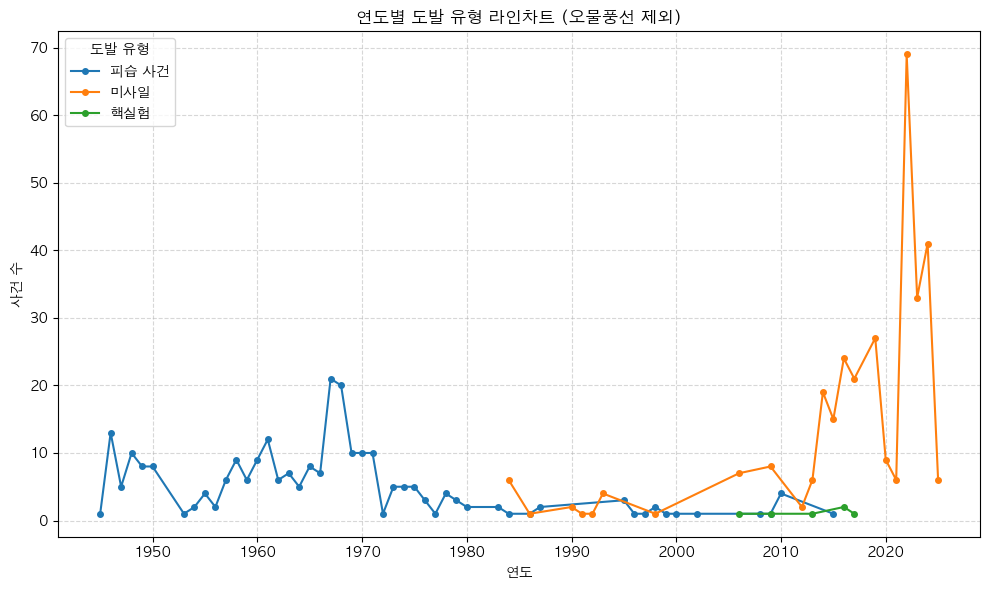

In [12]:
plt.figure(figsize=(10, 6))

for t in provocation_events['Type'].unique():
    if t == '오물풍선':  
        continue
    
    df_type = provocation_events[provocation_events['Type'] == t].groupby('Year').size()
    plt.plot(df_type.index, df_type.values, marker='o', markersize=4, label=t)

plt.title("연도별 도발 유형 라인차트 (오물풍선 제외)")
plt.xlabel("연도")
plt.ylabel("사건 수")
plt.legend(title="도발 유형")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 2) 북한 정권별 도발 유형 분포 (오물풍선 제외)

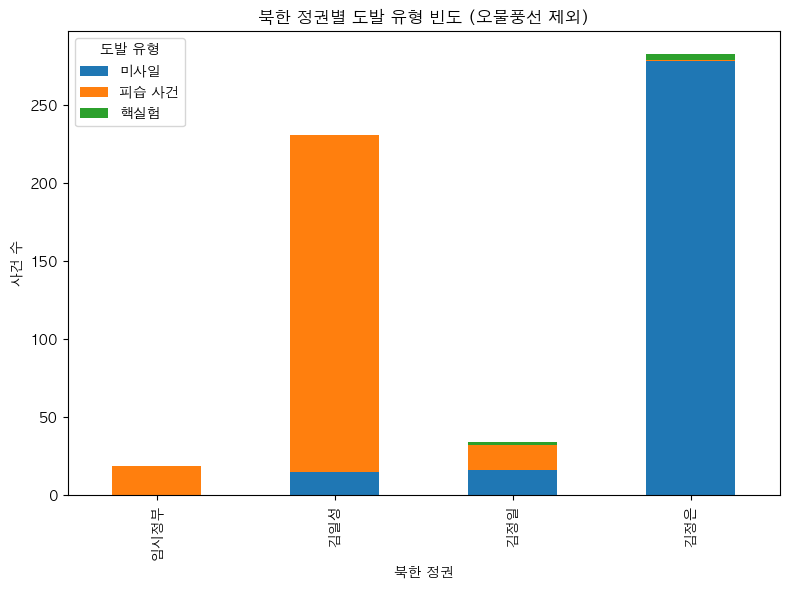

In [13]:
provocation_events['북한정권'] = pd.Categorical(
    provocation_events['n_gov'],
    categories=['임시정부', '김일성', '김정일', '김정은'],
    ordered=True
)

# 오물풍선 제외 후 집계
filtered_df = provocation_events[provocation_events['Type'] != '오물풍선']
df_north = filtered_df.groupby(['북한정권', 'Type'], observed=True).size().unstack(fill_value=0)

df_north.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('북한 정권별 도발 유형 빈도 (오물풍선 제외)')
plt.xlabel('북한 정권')
plt.ylabel('사건 수')
plt.legend(title='도발 유형')
plt.tight_layout()
plt.show()

#### 3) 한국 정권별 도발 유형 분포 (오물풍선 제외)

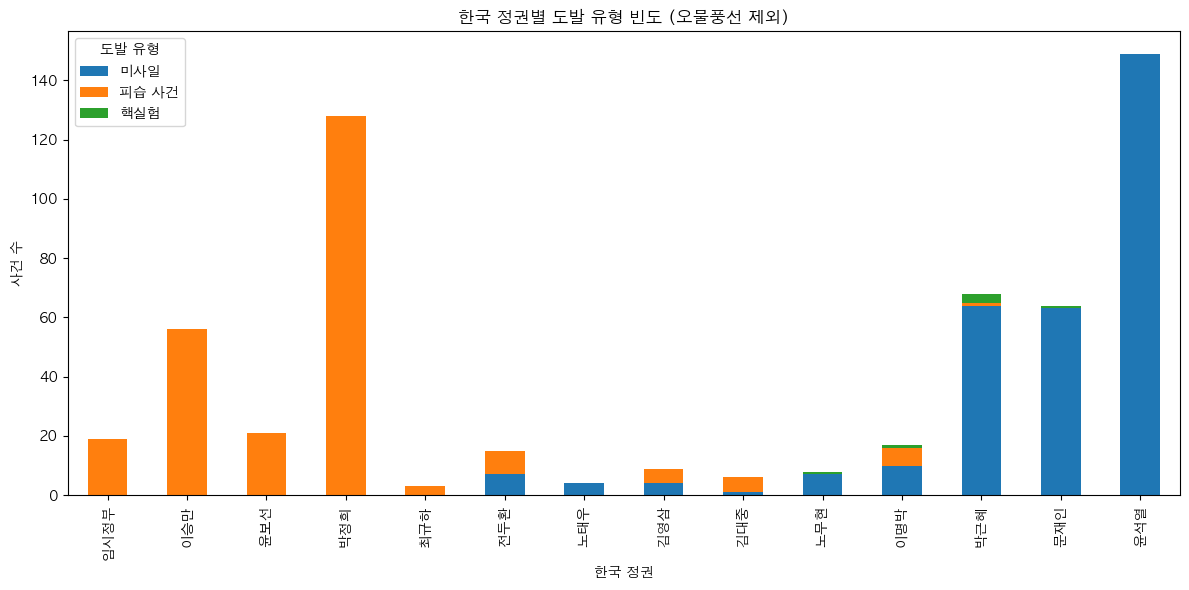

In [14]:
regime_order_s = ['임시정부', '이승만', '윤보선', '박정희', '최규하', '전두환', '노태우',
                  '김영삼', '김대중', '노무현', '이명박', '박근혜', '문재인', '윤석열']

provocation_events['한국정권'] = pd.Categorical(
    provocation_events['s_gov'],
    categories=regime_order_s,
    ordered=True
)

# 오물풍선 제외 후 집계
filtered_df = provocation_events[provocation_events['Type'] != '오물풍선']
df_south = filtered_df.groupby(['한국정권', 'Type'], observed=True).size().unstack(fill_value=0)

# 시각화
df_south.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('한국 정권별 도발 유형 빈도 (오물풍선 제외)')
plt.xlabel('한국 정권')
plt.ylabel('사건 수')
plt.legend(title='도발 유형')
plt.tight_layout()
plt.show()

------------